# Анализ игровых платформ


____    
    
**Название проекта**

Анализ игровых платформ
    
_____
**Цель исследования.**
    
Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
_____
**Задачи исследования.**

Для этого нам необходимо загрузить данные и изучить общую информацию о датафрейме. 
После проверить наличие пропущенных значений и дубликатов в датафреймах, обработать их, если такие значения присутствуют.
Произвести исследовательский анализ на основе информации о жанре игр, количества  игр, платформах и их продажах. На основе этого выбрать актуальный период для прогноза. 
Определить портрет пользователя различных регионов. 
А так же проверить ряд гипотез о пользовательских рейтингах различных платформ и жанров.
_____
**Исходные данные.**
    
У нас в распоряжении  из открытых источников исторические данные о названии игр и их продажах, оценки пользователей и экспертов, жанры и платформы до 2016 года.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

***Часть 2. Подготовка данных:***
* [1. Нахождение и ликвидация пропусков.](#2-bullet)
* [2. Приведение данных к нужным типам.](#3-bullet)
* [3. Нахождение и ликвидация дубликатов.](#4-bullet)

***Часть 3. Исследовательский анализ данных:***
* [1. Изучение количества игр выпущенных в разные года и выявление особенностей.](#5-bullet)
* [2. Изучение изменений продаж по платформам и выявление актуального периода для дальнейшего анализа.](#6-bullet)
* [3. Выявление потенциально прибыльных платформ в актуальный период.](#7-bullet)
* [4. Рассмотрение зависимости продаж от оценок критиков и от оценок пользователей на платформах ps4, pc, 3ds.](#8-bullet)
* [5. Рассмотрение общего распределения игр по жанрам в актуальный период.](#9-bullet)

***Часть 4. Портрет пользователя каждого региона***
* [1. Портрет пользователя из Северной Америки, выявление популярных платформ, жанров и выявление влияния ретинга ESRB на продажи данного региона.](#10-bullet)
* [2. Портрет пользователя из Европы, выявление популярных платформ, жанров и выявление влияния ретинга ESRB на продажи данного региона.](#11-bullet)
* [3. Портрет пользователя из Японии, выявление популярных платформ, жанров и выявление влияния ретинга ESRB на продажи данного региона.](#12-bullet)

***Часть 5. Статистический анализ***
* [1. Проверка гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#13-bullet)
* [2. Проверка гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные.](#14-bullet)


##  <a name=1> Обзор данных</a>

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np   
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
#cчитывание CSV-файла с данными с помощью библиотеки pandas и сохранение в датафрейм
data = pd.read_csv('/datasets/games.csv')

In [3]:
#выведение первых 10 строчек датафрейма методом head()
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#выведение основной информации по датафрейму методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Комментарий:** *После загрузки данных и просмотрев информацию по датафрему, можем сказать, что в данном датафрейме мы можем найти информацию: название игры, платформа, год выпуска, жанр игры, продажи в Северной Америке, продажи в Европе, продажи в Японии, продажи в других странах, оценка критиков, оценка пользователей, рейтинг от организации ESRB. Объем данных составляет 16713 строчек и 11 столбцов, после выведения информации методом info() так же можем увидеть, что данные имеют пропуски в некоторых столбцах: год выпуска, название, жанр, оценка критиков, оценка пользователей, рейтинг.*

## Предобработка данных

In [5]:
#приведение названия столбцов к нижнему регистру методом lower()
data.columns = data.columns.str.lower()

In [6]:
#выведение количества пропущенных значений методом isna()
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#выведение количества пропущенных значений методом isna() в процентном соотношении
pd.DataFrame(round(data.isna().mean() * 100, 1))

,0
name,0.0
platform,0.0
year_of_release,1.6
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,40.1


In [8]:
# удаление строк с пропущенными значениями в столбце 'name' методом dropna 
data = data.dropna(subset=['name'])

In [9]:
# удаление строк с пропущенными значениями в столбце 'genre' методом dropna 
data = data.dropna(subset=['genre'])

In [10]:
#приведение данных столбца 'name' к нижнему регистру методом lower()
data['name'] = data['name'].str.lower()

In [11]:
#приведение данных столбца 'genre' к нижнему регистру методом lower()
data['genre'] = data['genre'].str.lower()

In [12]:
#приведение данных столбца 'platform' к нижнему регистру методом lower()
data['platform'] = data['platform'].str.lower()

In [13]:
#выведение количества явных дубликатов методом duplicated().sum()
data.duplicated().sum()

0

In [14]:
# выведение неявных дубликатов  методом duplicated() по подмножеству
duplicates = data.duplicated(subset = ['name', 'genre', 'platform'], keep = False)
data[duplicates]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,sonic the hedgehog,ps3,2006.0,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,ps3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,need for speed: most wanted,pc,2012.0,racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [15]:
#удаление неявных дубликатов методом drop_duplicates()
data = data.drop_duplicates(subset = ['name', 'genre', 'platform'])

In [16]:
#рассмотрение корреляции значений между собой методом corr()
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.092284,0.004070,-0.168462,0.037851,0.011202
na_sales,-0.092284,1.000000,0.765386,0.449682,0.638693,0.240778
eu_sales,0.004070,0.765386,1.000000,0.435093,0.722818,0.221022
jp_sales,-0.168462,0.449682,0.435093,1.000000,0.291088,0.152673
other_sales,0.037851,0.638693,0.722818,0.291088,1.000000,0.198614
critic_score,0.011202,0.240778,0.221022,0.152673,0.198614,1.000000


In [17]:
#замена пропущенных значений в столбце 'user_score' на 'tbd' методом fillna()
data['user_score'] = data['user_score'].fillna('tbd')

In [18]:
#замена пропущенных значений в столбце 'rating' на 'unknown' методом fillna()
data['rating'] = data['rating'].fillna('unknown')

In [19]:
# выведение нового столбца общих продаж путем сложения нескольких столбцов и округления методом  round()
data['revenue'] = round(data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns'), 1)

In [20]:
#выведение первых 10 строчек датафрейма
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.5
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,tbd,unknown,40.2
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.5
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.8
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,tbd,unknown,31.4
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,tbd,unknown,30.3
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.8
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.9
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.3
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,tbd,unknown,28.3


In [21]:
#выведение основной информации по датафрейму методом info() после обработки пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       16709 non-null  object 
 10  rating           16709 non-null  object 
 11  revenue          16709 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


In [22]:
#выведение количества пропущенных значений методом isna() после обработки пропущенных значений
data.isna().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating                0
revenue               0
dtype: int64

**Комментарий:** *После обзора данных приступаем к предобработке данных, просматриваем по датафрему количество пропущенных значений, как и предполагалось на этапе обзора данных, пропущенные знанения имеются в столбцах:год выпуска, название, жанр, оценка критиков, оценка пользователей, рейтинг. Наибольшее количество пропусков находится в столбцах: оценка критиков(51%), оценка пользователей(40.1%), рейтинг(40.5%).*

*Пропущенные значение в столбцах жанра и наименования имеют в 2 строках, поэтому мы удалили данные строчки из датафрема, так как объем пропущенных данных минимальный при проверке данных строк все значения пропущены. Далее привели столбцы: наименование, жанр и платформу к нижнему регистру для более удобного обнаружения явных дубликатов в датафреме. Затем произвели обработку явных дубликатов, их не обнаружили. Приступили к выявлению неявных дубликатов по подмножеству, а именно по столбцам наименование, жанр и год выпуска, обнаружено 8 неявных дубликатов, с дальнейшим удалением неявных дубликатов.*

*Далее рассмотрели корреляцию значений между собой для обнаружения возможной взаимосвязи и возможной дальнейшей обработкой на данной взаимосвязи пропущенных значений, но данных взаимосвязей не обнаружено. В связи с этим принято решение не трогать пропуски в столбцах: год выпуска, оценка критиков, так как невозможно восстановить данные для точного анализа. В столбце оценка пользователей есть значение "tbd"(английская аббревиатура, которая означает «будет определено» или «будет установлено»),так как возможно пропущенные данные связаны с тем, что оценка пользователей еще не установлена  или не определена на данный момент, в связи с этим  замену пропусков в оценке пользователей заменили на "tbd". Так же сделали замену пропусков в рейтинге, на значение 'unknown' так как, оценка неизвестна, для удобной группировки значений в дальнейшем.*

## Исследовательский анализ

### Количество игр в разные года

In [23]:
data_year_count = data.drop_duplicates(subset = ['name', 'year_of_release'], keep = 'first')

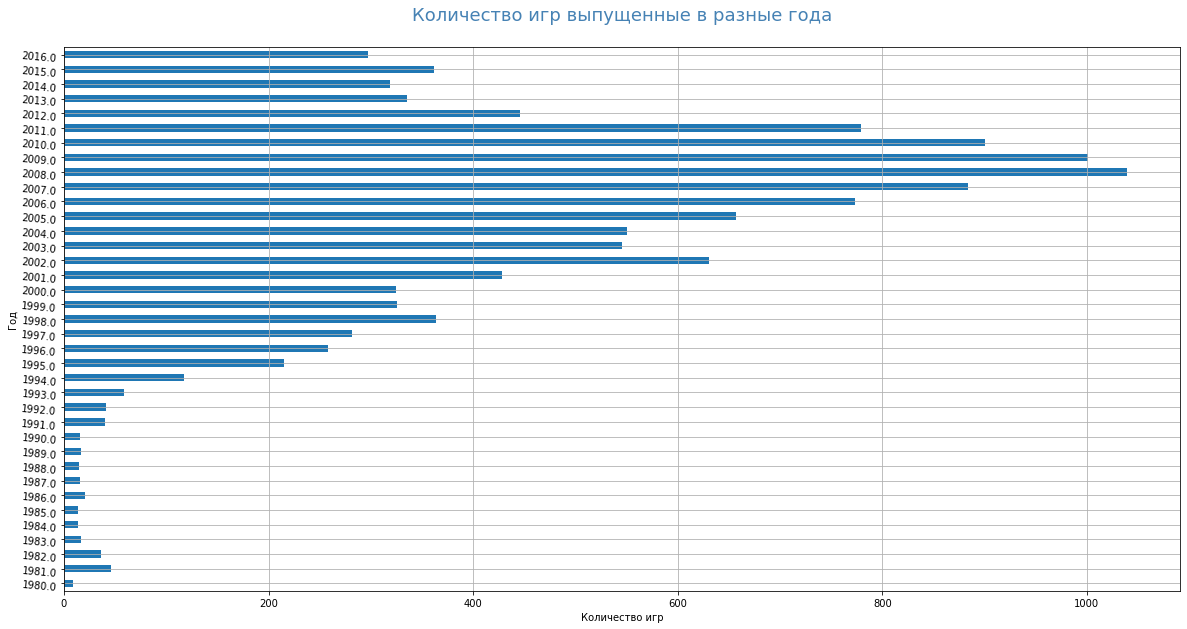

In [24]:
#построение баров по df столбцу 'year_of_release'
(data_year_count
    .groupby('year_of_release')['year_of_release'].count()
    .plot(kind = 'barh',x = 'year_of_release', figsize = (20,10), rot = -5,
                  legend = False, fontsize = 10, grid=True)
    .set_title('Количество игр выпущенные в разные года' + "\n", fontsize = 18, color = 'SteelBlue')    
        );  
plt.ylabel('Год')
plt.xlabel('Количество игр')
plt.show()

**Комментарий:** *Из графика видим, что рост выпуска игр начинается с 1995 с последующим увеличением количества, так в этот период в игровой индустрии во всех жанрах осваивается 3D окружение, а двухмерные игры становятся лучше. По мере развития графики, трехмерности игр, выход онлайн игр, идет больший выпуск игр пик приходится на 2007-2011 г. Резкий спад в 2012 возможно с ростом сигмента мобильных игр и большим доходом с многопользовательских онлайн-игр, чем с консолей, как гипотеза. Для формирования прогноза на 2017 год, будем брать период с 2012 года, так как с этого периода значения находятся на одно уровне, при выборе более раннего периода произойдет искажение, так как слишком большой разрыв идет между 2011 и 2012 годом.*

### Изменение продаж по платформам 

In [25]:
#формирование df группоривкой значений столбца 'platform' и суммы значений столбца 'revenue' с сортировкой по убыванию
data.groupby('platform')['revenue'].sum().sort_values(ascending=False)

platform
ps2     1250.2
x360     967.3
ps3      933.3
wii      904.3
ds       793.5
ps       726.3
gba      314.5
ps4      312.5
psp      284.8
3ds      257.5
gb       255.3
xb       254.7
nes      251.0
pc       249.9
n64      218.6
snes     200.2
gc       197.0
xone     158.4
2600      96.9
wiiu      81.6
psv       49.7
sat       33.5
gen       28.1
dc        15.8
scd        1.8
ws         1.4
ng         1.3
3do        0.1
tg16       0.1
pcfx       0.0
gg         0.0
Name: revenue, dtype: float64

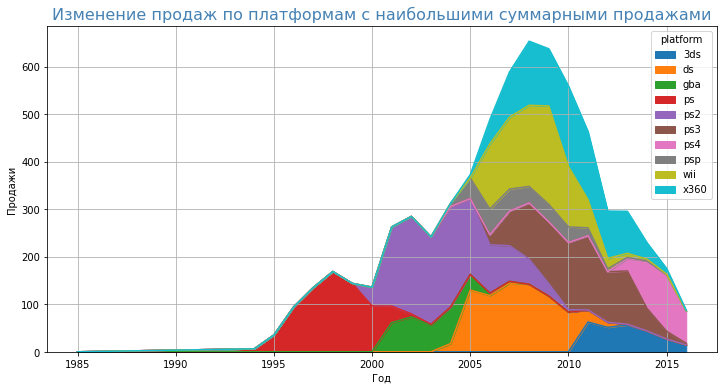

In [26]:
#построение площадного графика по срезу,полученному методом query()
(data
    .query('platform in ["ps2","x360","ps3","wii","ds","ps","gba","ps4","psp","3ds"]')
    .pivot_table(index = 'year_of_release',columns = 'platform', values = 'revenue', aggfunc = 'sum')
    .plot(kind = 'area', legend = True, grid = True, figsize = (12, 6))
    .set_title('Изменение продаж по платформам с наибольшими суммарными продажами', color = 'SteelBlue', fontsize = 16)
)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

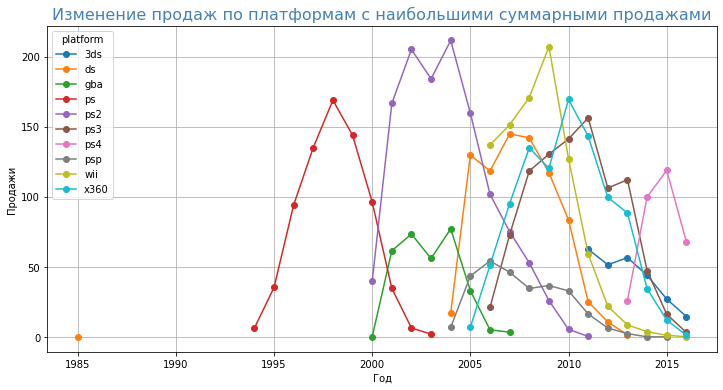

In [27]:
#построение линейного графика по срезу,полученному методом query()
(data
    .query('platform in ["ps2","x360","ps3","wii","ds","ps","gba","ps4","psp","3ds"]')
    .pivot_table(index = 'year_of_release',columns = 'platform', values = 'revenue', aggfunc = 'sum')
    .plot(legend = True, grid = True, figsize = (12, 6), style = 'o-')
    .set_title('Изменение продаж по платформам с наибольшими суммарными продажами', color = 'SteelBlue', fontsize = 16)
)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

In [28]:
#рассмотрение среза с 2005 года
data_list = data.loc[data['year_of_release'] >= 2005]

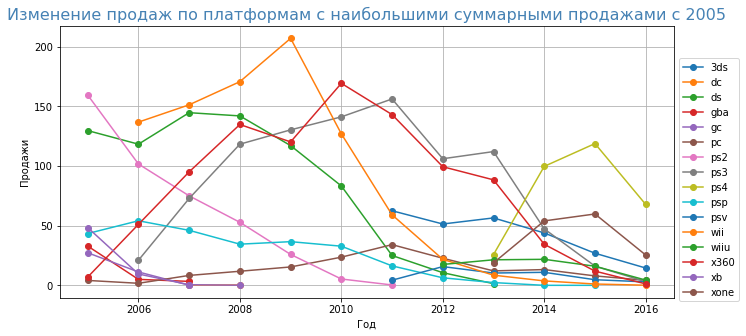

In [29]:
#построение линейного графика по срезу,полученному методом query() с 2005 года
(data_list
    .pivot_table(index = 'year_of_release',columns = 'platform', values = 'revenue', aggfunc = 'sum')
    .plot(grid = True, figsize = (11, 5), style = 'o-')
    .set_title('Изменение продаж по платформам с наибольшими суммарными продажами с 2005', color = 'SteelBlue', fontsize=16)
)
plt.legend(bbox_to_anchor=(1, 0.9))
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**Комментарий:** *При рассмотрении визуализации по изменению продаж по платформам с наибольшими суммарными продажами можно увидеть, что примерно с 1995 начинается резкий рост платформы рс, в связи с этим отмечен рост ранее по количеству выпущенных игр. Примерно с 2005 появляется много платформ с высокими продажами(х360, ds, psp и т.д.) и идет спад (gba, ps2) и исчезновение (ps), тем самым можно объяснить что именно с 2005 идет резкий рост количества выпущенных игр).*

### Потенциально прибыльные платформы за актуальный период  

In [30]:
#создание df путем логической индексации данных с реализацией игр с 2012 года
data_list_new =  data[data['year_of_release'] >= 2012]

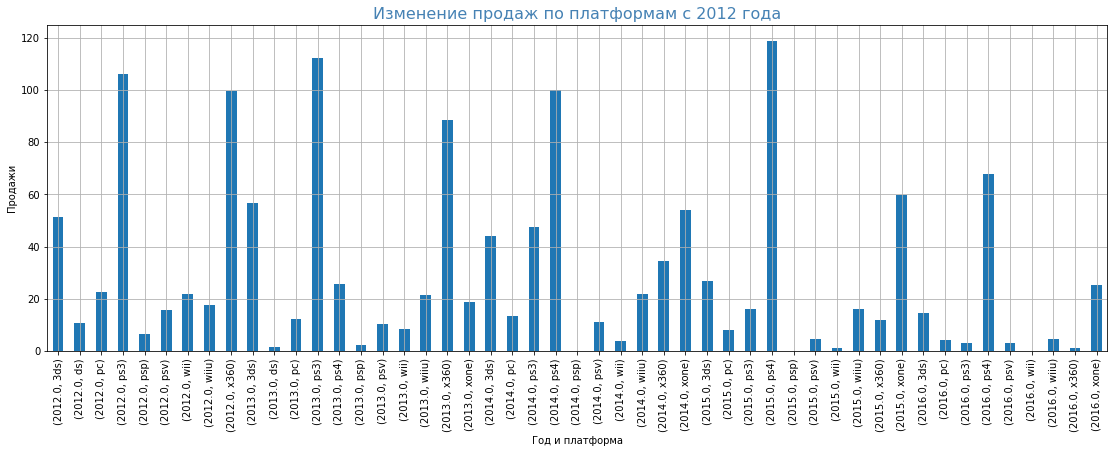

In [31]:
#построение баров по году реализации и платформе с выведением количества продаж
data_list_2012 = data_list_new[['year_of_release', 'platform', 'revenue']]
data_list_2012.groupby(['year_of_release', 'platform']).agg({'revenue':'sum'}).plot(kind = 'bar',figsize = (19,6), 
                                                                                    legend = False, grid=True)
plt.title('Изменение продаж по платформам c 2012 года', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Год и платформа')
plt.ylabel('Продажи')
plt.show()

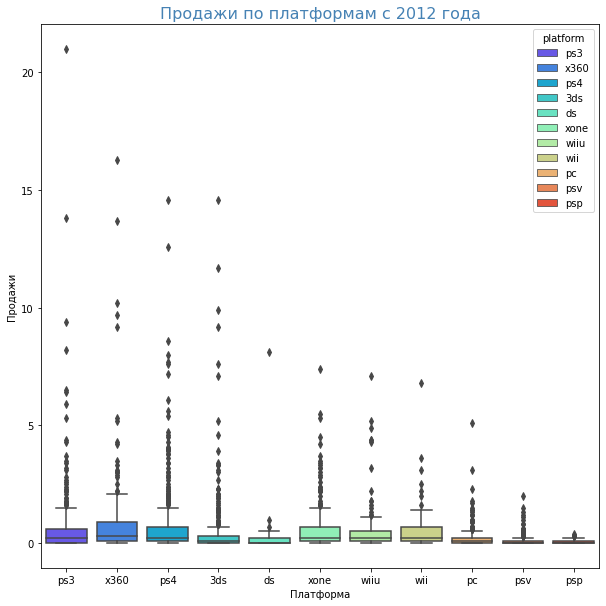

In [32]:
# построение ящиков с усами по продажам каждой платформы
plt.figure(figsize = (10, 10))
sns.boxplot(x = "platform", y = "revenue", data = data_list_new, palette = 'rainbow', hue = "platform", dodge = False)
plt.title('Продажи по платформам c 2012 года', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

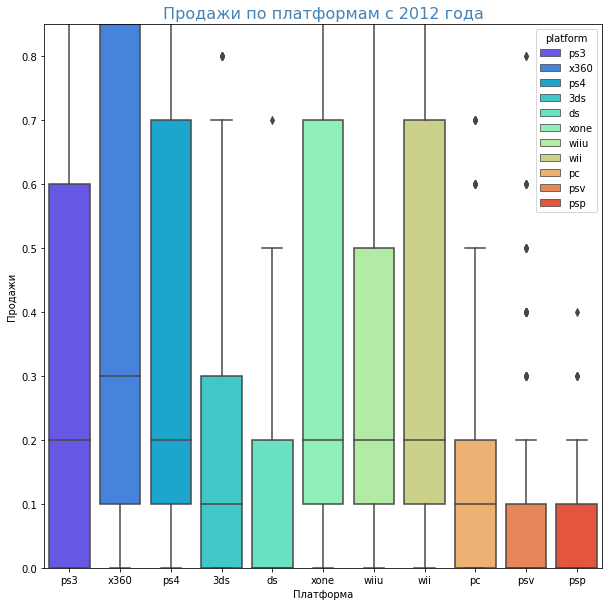

In [33]:
# построение ящиков с усами по продажам каждой платформы
plt.figure(figsize = (10, 10))
sns.boxplot(x = "platform", y = "revenue", data = data_list_new, palette = 'rainbow', hue = "platform", dodge = False)
plt.title('Продажи по платформам c 2012 года', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0, 0.85)
plt.show()

**Комментарий:** *При построении визуализации данных за актуальный период (с 2012 года) можем увидеть рост 2014-2016 платформы ps4 и xone, которые лидирует по продажам по сравнению с другими и спад в 2013 платформы ps3, в связи с выходом новой ps4, хотя до этого по данной платформе 2012-2013 самые высокие продажи были именно на ней. Спад и возможное исчезновение произошло с платформами wii и psp.*

*При построении ящиков с усами по платформам и продажам видим большие выбросы с продажами у платформы ps3, x360, ps4 и 3ds вероятнее всего связанные с отдельными играми, которые пользуются большой популярностью и в связи с этим имеют высокие продажи. Более широкий межквартальный размах имеют платформы ps4, ps3, x360, xone  и wiiu скорее всего имеют большее количество данных и их разброс по продажам по сравнению с другими. Так же можно увидеть, что медианное значение продаж  x360 выше, чем на других платформах, на примерно одном уровне достаточно высоком находится медианное значений продаж платформ ps3, ps4, xone, wiiu, wii.*

*Малое количество данных по продажам на платформах psv, хотя имеются ряд выбросов связанные с отдельной популярностью определенных игр и платформа psp имеющая минимальные продажи. При рассмотрении медианного значения продаж очень низкие по сранению с другими платформами у psv, psp и количество значений продаж значительно меньше, чем на других платформах.*

### Зависимость продаж от оценки критиков и пользователей

#### ps4 

In [34]:
#построение среза данных по платформе ps4 путем логической индексации 
data_ps4 = data[(data['platform'] == 'ps4')&(data['year_of_release'] >= 2012)]

In [35]:
#рассмотрение корреляции значений между собой методом corr()
data_ps4 = data_ps4[data_ps4['user_score'] != 'tbd']
data_ps4['user_score'] = data_ps4['user_score'].astype('float')
data_ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,revenue
year_of_release,1.000000,-0.268597,-0.197550,-0.130492,-0.239292,-0.019983,0.152447,-0.241534
na_sales,-0.268597,1.000000,0.717128,0.534556,0.916074,0.414241,-0.020933,0.894149
eu_sales,-0.197550,0.717128,1.000000,0.523301,0.935533,0.346044,-0.048925,0.952090
jp_sales,-0.130492,0.534556,0.523301,1.000000,0.570450,0.322057,0.171332,0.596049
other_sales,-0.239292,0.916074,0.935533,0.570450,1.000000,0.408465,-0.035639,0.997591
critic_score,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405430
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.032221
revenue,-0.241534,0.894149,0.952090,0.596049,0.997591,0.405430,-0.032221,1.000000


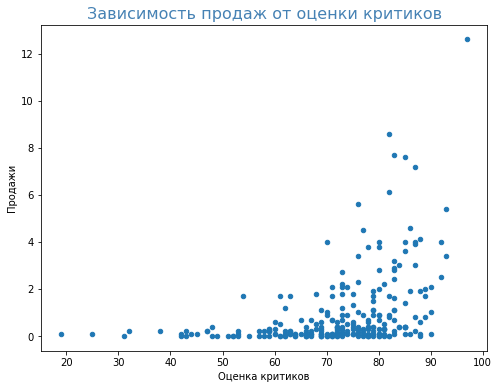

In [36]:
#построение диаграммы рассеивания по значениям продаж и оценки критиков ps4
data_ps4.plot(y = 'revenue', x = 'critic_score',kind = 'scatter', figsize = (8,6))
plt.title('Зависимость продаж от оценки критиков', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

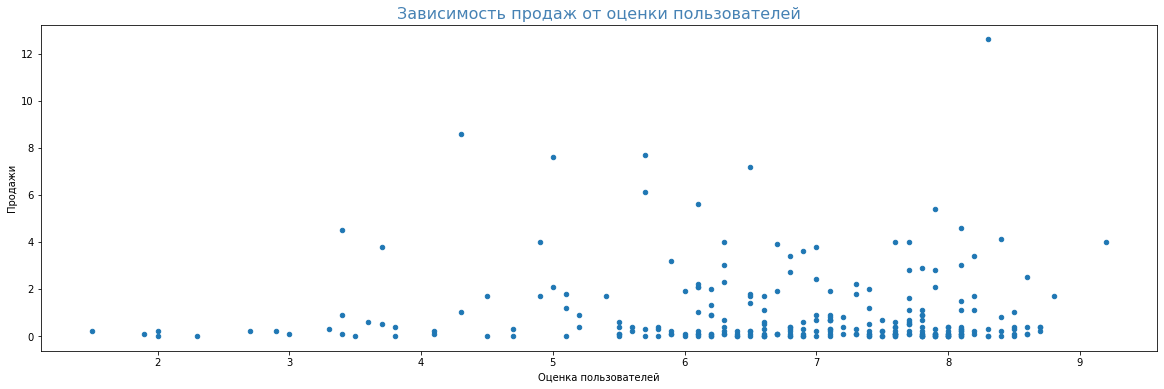

In [37]:
#построение диаграммы рассеивания по значениям продаж и оценки пользователей ps4
data_ps4.plot(y = 'revenue', x = 'user_score',kind = 'scatter', figsize = (20,6))
plt.title('Зависимость продаж от оценки пользователей', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

#### 3ds

In [38]:
#построение среза данных по платформе 3ds путем логической индексации 
data_3ds = data[(data['platform'] == '3ds')&(data['year_of_release'] >= 2012)]

In [39]:
#рассмотрение корреляции значений между собой методом corr()
data_3ds = data_3ds[data_3ds['user_score'] != 'tbd']
data_3ds['user_score'] = data_3ds['user_score'].astype('float')
data_3ds.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,revenue
year_of_release,1.000000,-0.244601,-0.191544,-0.144508,-0.214204,-0.033121,0.090701,-0.207381
na_sales,-0.244601,1.000000,0.928746,0.732688,0.988041,0.316306,0.185631,0.939554
eu_sales,-0.191544,0.928746,1.000000,0.813393,0.971859,0.251750,0.118699,0.967921
jp_sales,-0.144508,0.732688,0.813393,1.000000,0.773999,0.299320,0.238252,0.910891
other_sales,-0.214204,0.988041,0.971859,0.773999,1.000000,0.298015,0.162372,0.965038
critic_score,-0.033121,0.316306,0.251750,0.299320,0.298015,1.000000,0.722762,0.314311
user_score,0.090701,0.185631,0.118699,0.238252,0.162372,0.722762,1.000000,0.196064
revenue,-0.207381,0.939554,0.967921,0.910891,0.965038,0.314311,0.196064,1.000000


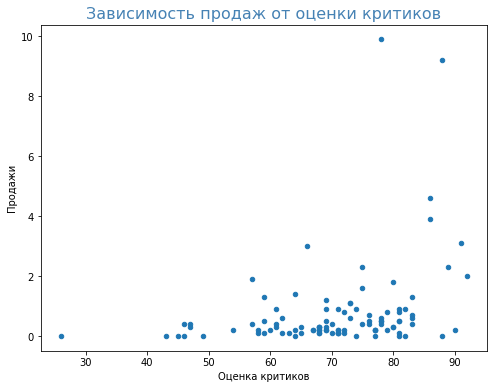

In [40]:
#построение диаграммы рассеивания по значениям продаж и оценки критиков 3ds
data_3ds.plot(y = 'revenue', x = 'critic_score',kind = 'scatter', figsize = (8,6))
plt.title('Зависимость продаж от оценки критиков', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

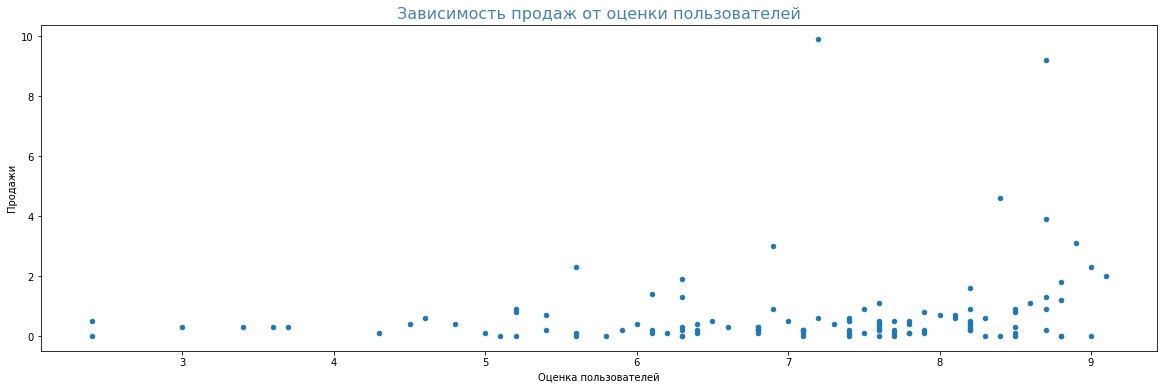

In [41]:
#построение диаграммы рассеивания по значениям продаж и оценки пользователей 3ds
data_3ds.plot(y = 'revenue', x = 'user_score',kind = 'scatter', figsize = (20,6))
plt.title('Зависимость продаж от оценки пользователей', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

#### pc 

In [42]:
#построение среза данных по платформе pc путем логической индексации 
data_pc = data[(data['platform'] == 'pc')&(data['year_of_release'] >= 2012)]

In [43]:
#рассмотрение корреляции значений между собой методом corr()
data_pc = data_pc[data_pc['user_score'] != 'tbd']
data_pc['user_score'] = data_pc['user_score'].astype('float')
data_pc.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,revenue
year_of_release,1.000000,-0.195217,-0.228636,NaN,-0.294078,0.010539,-0.105858,-0.237525
na_sales,-0.195217,1.000000,0.842562,NaN,0.921839,0.218319,-0.113147,0.947619
eu_sales,-0.228636,0.842562,1.000000,NaN,0.929643,0.236924,-0.118923,0.967347
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,-0.294078,0.921839,0.929643,NaN,1.000000,0.226514,-0.107708,0.970031
critic_score,0.010539,0.218319,0.236924,NaN,0.226514,1.000000,0.430926,0.242244
user_score,-0.105858,-0.113147,-0.118923,NaN,-0.107708,0.430926,1.000000,-0.116087
revenue,-0.237525,0.947619,0.967347,NaN,0.970031,0.242244,-0.116087,1.000000


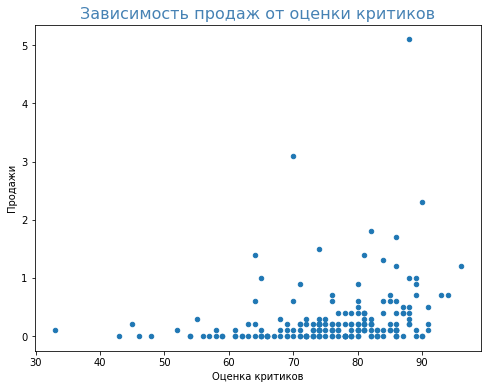

In [44]:
#построение диаграммы рассеивания по значениям продаж и оценки критиков 3ds
data_pc.plot(y = 'revenue', x = 'critic_score',kind = 'scatter', figsize = (8,6))
plt.title('Зависимость продаж от оценки критиков', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

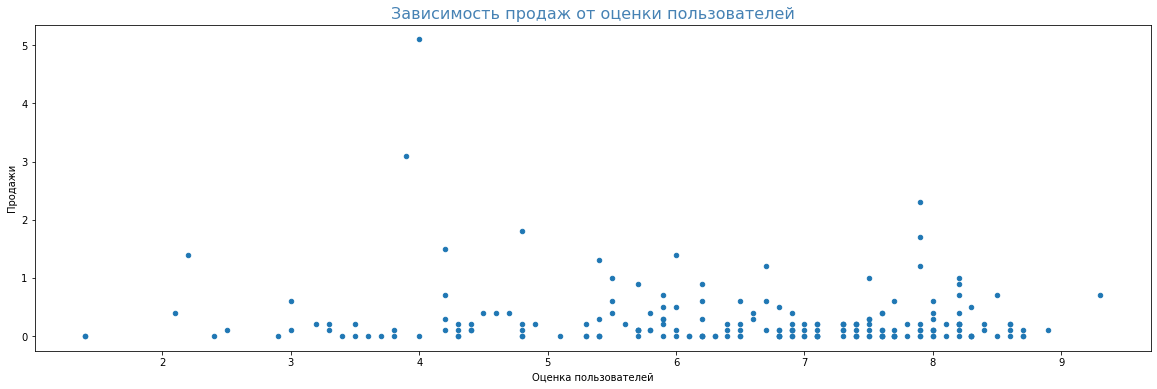

In [45]:
#построение диаграммы рассеивания по значениям продаж и оценки пользователей 3ds
data_pc.plot(y = 'revenue', x = 'user_score',kind = 'scatter', figsize = (20,6))
plt.title('Зависимость продаж от оценки пользователей', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

**Комментарий:** *Для рассмотрения зависимости продаж от оценок критиков и пользователей взяли на рассмотрение данные по платформах ps4, 3ds, pc. При рассмотрении корреляции значений можно обратить внимание на наличии прямой, слабой степени выраженности взаимосвязи между продажами и оценкой критиков.* 

### Общее распределение игр по жанрам

In [46]:
#получение данных по жанрам методом группировки и выведением суммы, количества и доли с сортикорвкой по доле
data_genre_top = data_list_new.groupby('genre', as_index = False).agg({'revenue' : 'median', 'name' : 'count'})
data_genre_top = data_genre_top.sort_values(by = 'revenue' , ascending = False)
data_genre_top.columns = ['жанр','общая сумма продаж', 'количество игр']
data_genre_top['доля'] = data_genre_top['общая сумма продаж'] / data_genre_top['количество игр']
data_top = data_genre_top.sort_values(by = 'доля')
data_top

,жанр,общая сумма продаж,количество игр,доля
1,adventure,0.00,302,0.000000
5,puzzle,0.00,28,0.000000
0,action,0.10,1031,0.000097
7,role-playing,0.10,370,0.000270
3,misc,0.10,192,0.000521
10,sports,0.20,267,0.000749
2,fighting,0.10,109,0.000917
9,simulation,0.10,80,0.001250
6,racing,0.15,114,0.001316
11,strategy,0.10,71,0.001408


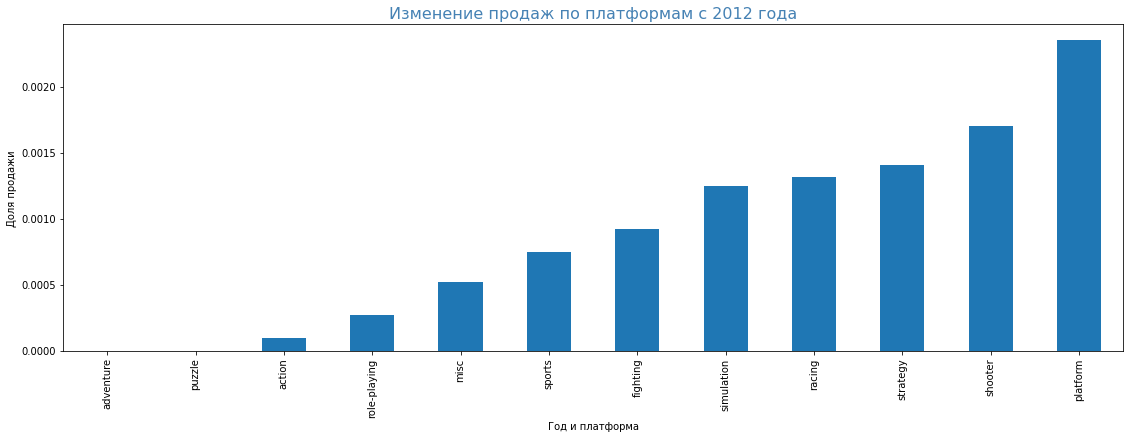

In [47]:
#построение баров по жанрам и их долям продаж
data_top.plot(kind = 'bar',x = 'жанр', y = 'доля', figsize = (19,6), legend = False)
plt.title('Изменение продаж по платформам c 2012 года', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Год и платформа')
plt.ylabel('Доля продажи')
plt.show()

**Комментарий:** *При рассмотрении данных по распределению жанров и их визуализации можем увидеть, что жанр platform имеет большое преимущество, посравнению с другими жанрами, соотношение количества и медианной суммы продаж высокое, данный жанр пользуется популярностью. Далее жанры shooter и strategy имеют так же значительную долю по отношению количества к продажам, что говорит о том, что данные игры имеют определенную популярность, хотя игр жанра platform в три раза меньше, чем жанра shooter. 
Жанр имеющий меньшую популярность, так как доля продаж у него самая низкая это adventure.*

## Портрет пользователя каждого региона

### Портрет пользователя  из Северной Америки

In [48]:
# формирование данных группировкой по 'platform' и выведением среднего 
data_na = (data_list_new
              .groupby('platform', as_index=False)
              .agg({'na_sales':['mean']})
             )
data_na.columns = ['платформа','доля продаж']
data_na_5 = data_na.sort_values(by = 'доля продаж', ascending=False)[:5]
data_na_5

,платформа,доля продаж
9,x360,0.479623
10,xone,0.377004
7,wii,0.323148
4,ps4,0.277398
8,wiiu,0.259184


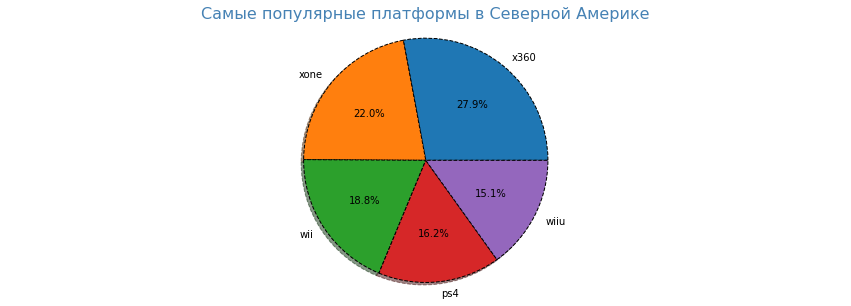

In [49]:
# построение круговой диаграммы по сформированным данным
data_na_pie = data_na_5['платформа']
data_na_pie_count = data_na_5['доля продаж']

fig, ax = plt.subplots(figsize = (15,5))
ax.pie(data_na_pie_count, labels=data_na_pie, autopct = '%1.1f%%',  shadow = True, 
       wedgeprops = {'lw':1, 'ls':'--','edgecolor':'k'}, rotatelabels = False)
ax.axis('equal')
plt.title('Самые популярные платформы в Северной Америке',fontsize = 16, color = 'SteelBlue')
plt.show()

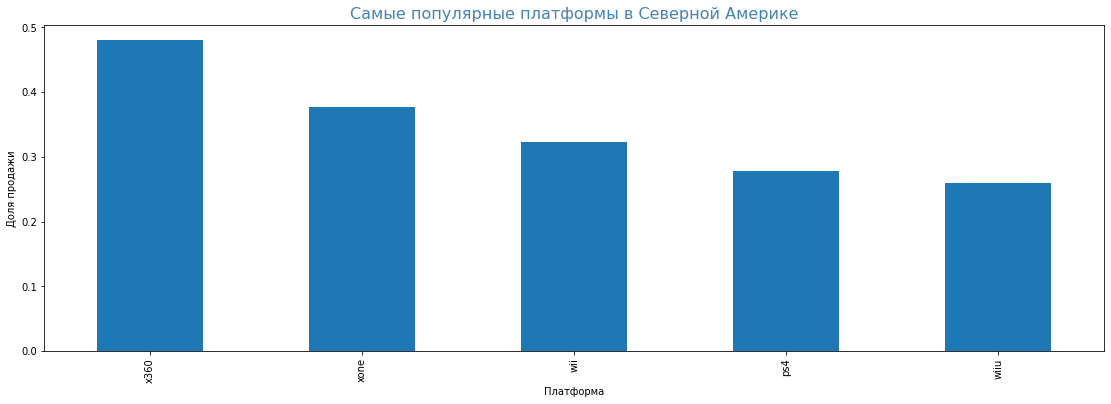

In [50]:
#построение баров по платформам и их долям продаж
(data_na_5
    .sort_values(by = 'доля продаж', ascending=False)
    .plot(kind = 'bar',x = 'платформа', y = 'доля продаж', figsize = (19,6), legend = False)
)
plt.title('Самые популярные платформы в Северной Америке', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Платформа')
plt.ylabel('Доля продажи')
plt.show()

In [51]:
# формирование данных группировкой по 'genre' и выведением среднего 
data_na_genre = (data_list_new
              .groupby('genre', as_index = False)
              .agg({'na_sales':['mean']})
             )
data_na_genre.columns = ['жанр','доля']
data_na_5_genre = data_na_genre.sort_values(by = 'доля', ascending = False)[:5]
data_na_5_genre

,жанр,доля
8,shooter,0.616043
10,sports,0.305356
4,platform,0.298588
3,misc,0.198906
2,fighting,0.181560


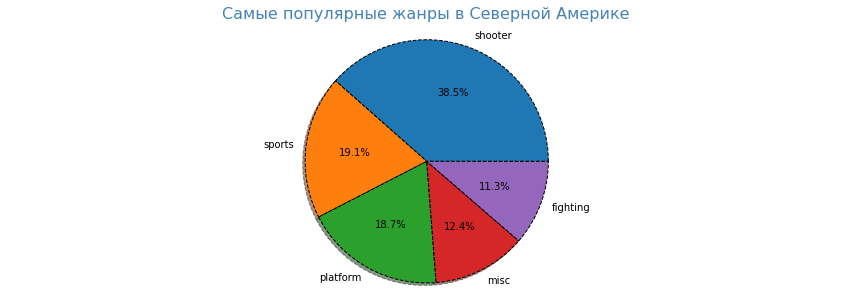

In [52]:
# построение круговой диаграммы по сформированным данным
data_na_pie_genre = data_na_5_genre['жанр']
data_na_pie_count_genre = data_na_5_genre['доля']

fig, ax = plt.subplots(figsize = (15,5))
ax.pie(data_na_pie_count_genre, labels = data_na_pie_genre, autopct = '%1.1f%%',  shadow = True, 
       wedgeprops = {'lw':1, 'ls':'--','edgecolor':'k'},rotatelabels = False)
ax.axis('equal')
plt.title('Самые популярные жанры в Северной Америке',fontsize = 16, color = 'SteelBlue')
plt.show()

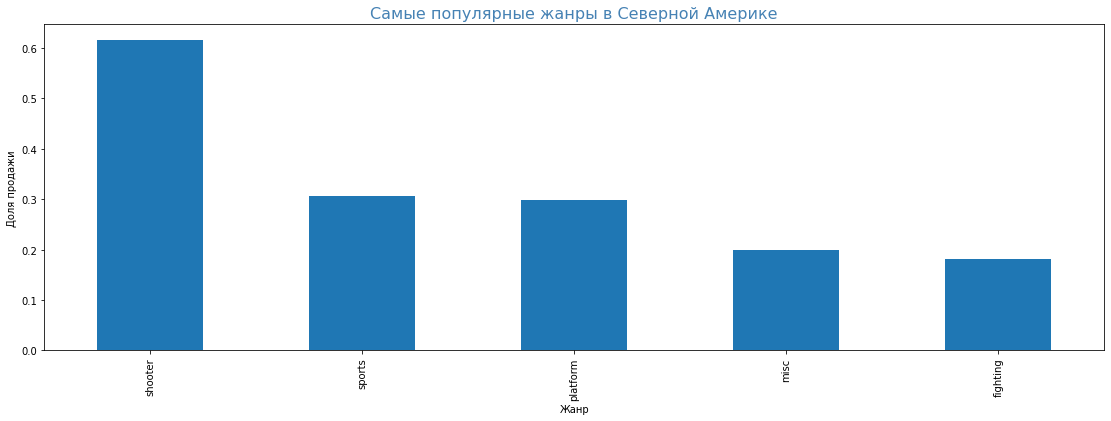

In [53]:
#построение баров по жанрам и их долям продаж
(data_na_5_genre
    .sort_values(by = 'доля', ascending=False)
    .plot(kind = 'bar',x = 'жанр', y = 'доля', figsize = (19,6), legend = False)
)
plt.title('Самые популярные жанры в Северной Америке', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Жанр')
plt.ylabel('Доля продажи')
plt.show()

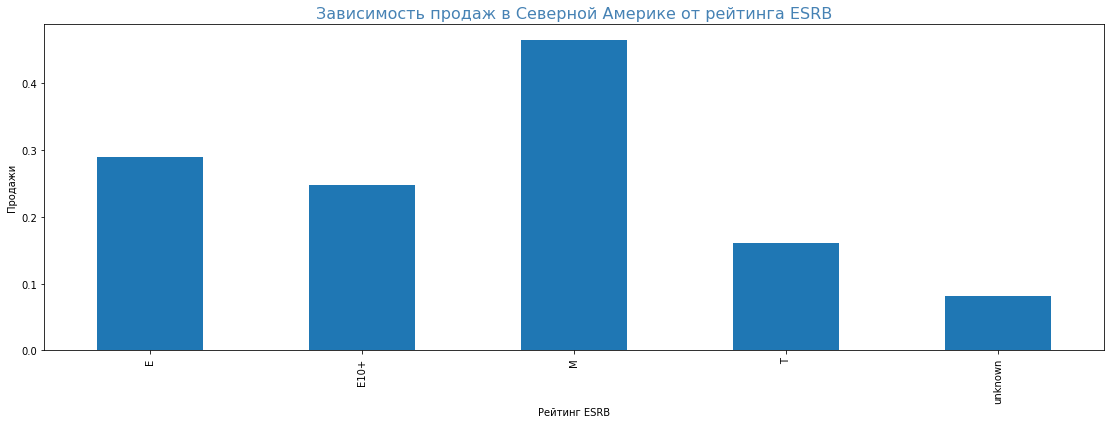

In [54]:
# построение баров по сгруппированным данным по распределению продаж в зависимости от рейтинга ESRB
data_list_new.groupby('rating')['na_sales'].mean().plot(kind = 'bar',  x='rating', y = 'na_sales', figsize = (19,6),
                                                        legend = False)
plt.title('Зависимость продаж в Северной Америке от рейтинга ESRB', color='SteelBlue', fontsize=16)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

**Комментарий:** *При формировании портрета пользователя Северной Америки выяснилось, что самыми популярными платформами данных пользователей является: x360 и xone. При рассмотрении популярных жанров данной категории пользователей выяснили, что большой популярностью обладает жанр shooter, в тройку входит так же sports и platform. При рассмотрении популярности среди рейтинга ESRB выделяется категория M (Для взрослых, страше 17 лет).*

### Портрет пользователя  из Европы

In [55]:
data_eu = (data_list_new
              .groupby('platform', as_index = False)
              .agg({'eu_sales':[ 'mean']})
             )
data_eu.columns = ['платформа','доля продаж']
data_eu_5 = data_eu.sort_values(by = 'доля продаж', ascending = False)[:5]
data_eu_5

,платформа,доля продаж
4,ps4,0.359923
9,x360,0.255205
7,wii,0.220741
3,ps3,0.217175
10,xone,0.208866


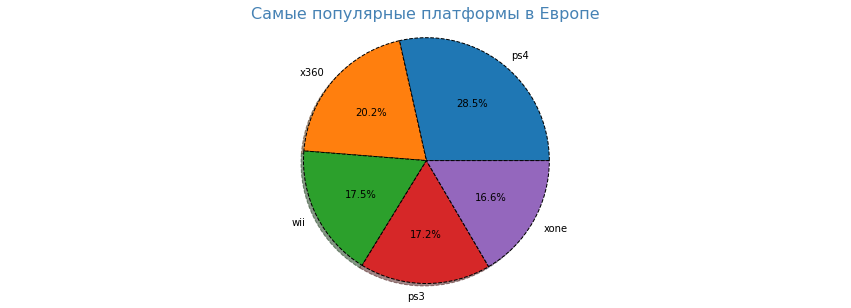

In [56]:
data_eu_pie = data_eu_5['платформа']
data_eu_pie_count = data_eu_5['доля продаж']

fig, ax = plt.subplots(figsize = (15,5))
ax.pie(data_eu_pie_count, labels = data_eu_pie, autopct = '%1.1f%%',  shadow = True, 
       wedgeprops = {'lw':1, 'ls':'--','edgecolor':'k'},rotatelabels = False)
ax.axis('equal')
plt.title('Самые популярные платформы в Европе',fontsize = 16, color = 'SteelBlue')
plt.show()

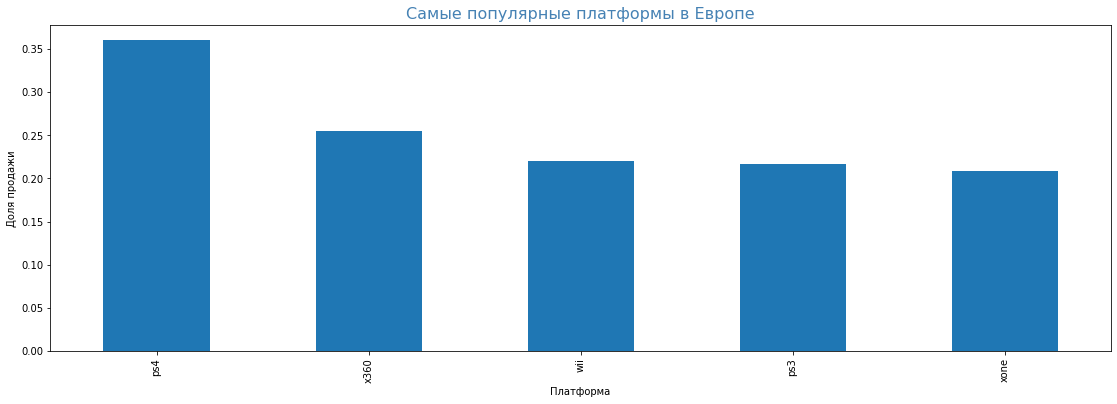

In [57]:
#построение баров по платформам и их долям продаж
(data_eu_5
    .sort_values(by = 'доля продаж', ascending=False)
    .plot(kind = 'bar',x = 'платформа', y = 'доля продаж', figsize = (19,6), legend = False)
)
plt.title('Самые популярные платформы в Европе', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Платформа')
plt.ylabel('Доля продажи')
plt.show()

In [58]:
data_eu_genre = (data_list_new
              .groupby('genre', as_index = False)
              .agg({'eu_sales':['mean']})
             )
data_eu_genre.columns = ['жанр','доля']
data_eu_5_genre = data_eu_genre.sort_values(by = 'доля', ascending = False)[:5]
data_eu_5_genre

,жанр,доля
8,shooter,0.482851
10,sports,0.258727
4,platform,0.251882
6,racing,0.238860
9,simulation,0.181875


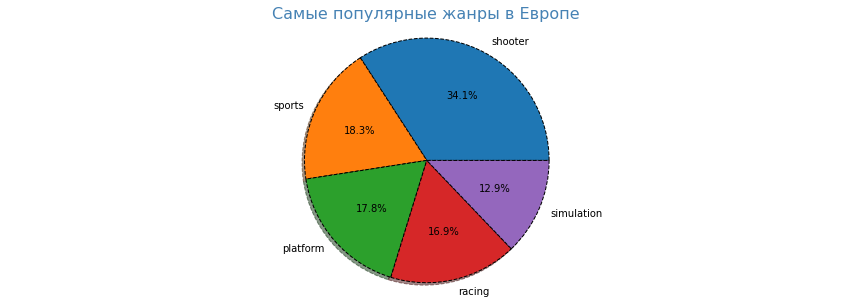

In [59]:
data_eu_pie_genre = data_eu_5_genre['жанр']
data_eu_pie_count_genre = data_eu_5_genre['доля']

fig, ax = plt.subplots(figsize = (15,5))
ax.pie(data_eu_pie_count_genre, labels = data_eu_pie_genre, autopct = '%1.1f%%',  shadow = True, 
       wedgeprops = {'lw':1, 'ls':'--','edgecolor':'k'},rotatelabels=False)
ax.axis('equal')
plt.title('Самые популярные жанры в Европе',fontsize = 16, color = 'SteelBlue')
plt.show()

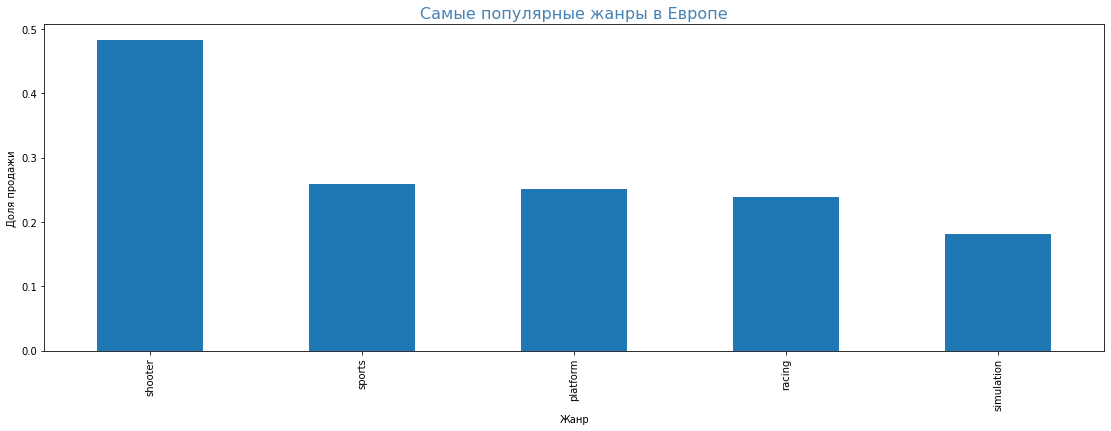

In [60]:
#построение баров по жанрам и их долям продаж
(data_eu_5_genre
    .sort_values(by = 'доля', ascending=False)
    .plot(kind = 'bar',x = 'жанр', y = 'доля', figsize = (19,6), legend = False)
)
plt.title('Самые популярные жанры в Европе', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Жанр')
plt.ylabel('Доля продажи')
plt.show()

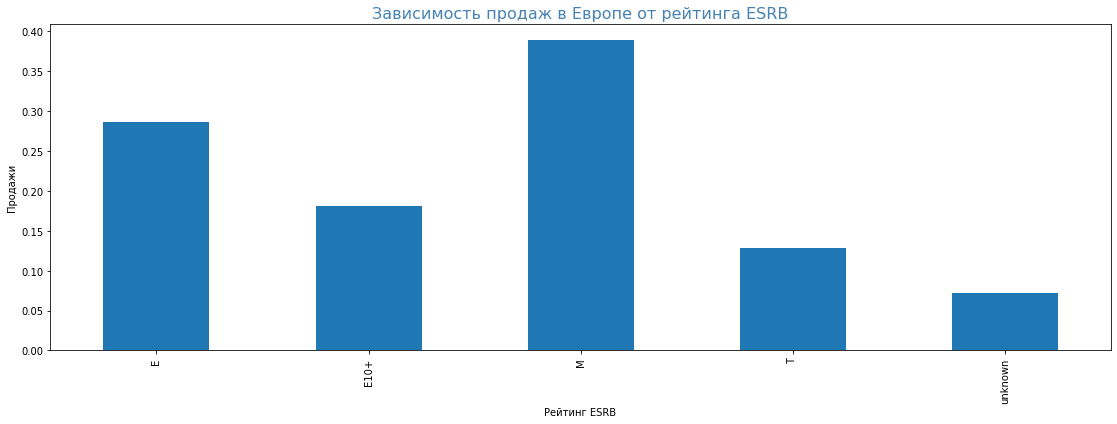

In [61]:
data_list_new.groupby('rating')['eu_sales'].mean().plot(kind = 'bar',  x = 'rating', y = 'eu_sales', 
                                                        figsize = (19,6), legend = False)
plt.title('Зависимость продаж в Европе от рейтинга ESRB',  color = 'SteelBlue', fontsize = 16)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

**Комментарий:** *При формировании портрета пользователя Европы выяснилось, что самыми популярными платформами данных пользователей является: x360 и ps4. При рассмотрении популярных жанров данной категории пользователей выяснили, что большой популярностью обладает жанр shooter, в тройку входит так же sports и platform. При рассмотрении популярности среди рейтинга ESRB выделяется категория M (Для взрослых, страше 17 лет). Схожие портреты у пользователей Северной Америки и Европы, отличие лишь в популярности определенных платформ.*

### Портрет пользователя  из Японии

In [62]:
data_jp = (data_list_new
              .groupby('platform', as_index=False)
              .agg({'jp_sales':['mean']})
             )
data_jp.columns = ['платформа','доля продаж']
data_jp_5 = data_jp.sort_values(by = 'доля продаж', ascending = False)[:5]
data_jp_5

,платформа,доля продаж
0,3ds,0.221692
1,ds,0.120000
8,wiiu,0.088503
3,ps3,0.071728
7,wii,0.062778


/tmp/ipykernel_490/1164700074.py:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(data_jp_pie_count, labels = data_jp_pie, autopct = '%1.1f%%',  shadow = True,


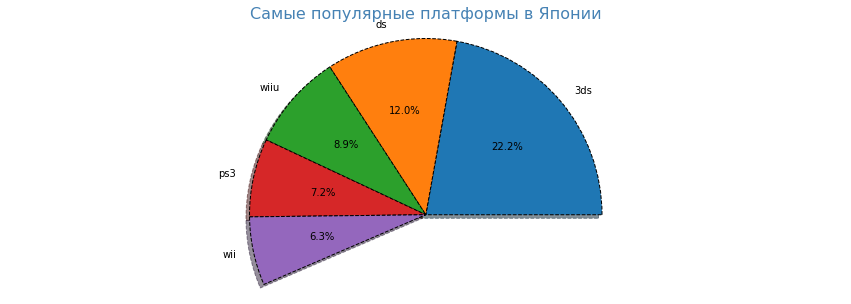

In [63]:
data_jp_pie = data_jp_5['платформа']
data_jp_pie_count = data_jp_5['доля продаж']

fig, ax = plt.subplots(figsize = (15,5))
ax.pie(data_jp_pie_count, labels = data_jp_pie, autopct = '%1.1f%%',  shadow = True, 
       wedgeprops = {'lw':1, 'ls':'--','edgecolor':'k'},rotatelabels = False)
ax.axis('equal')
plt.title('Самые популярные платформы в Японии',fontsize = 16, color = 'SteelBlue')
plt.show()

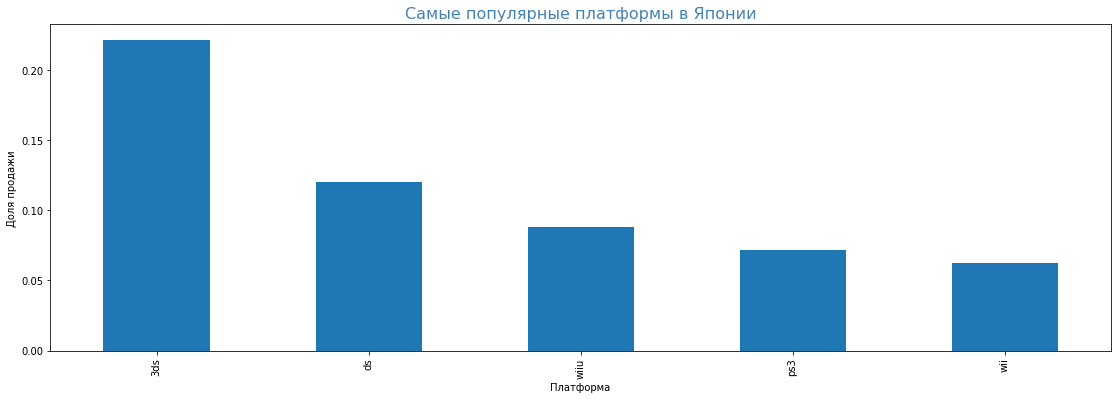

In [64]:
#построение баров по платформам и их долям продаж
(data_jp_5
    .sort_values(by = 'доля продаж', ascending=False)
    .plot(kind = 'bar',x = 'платформа', y = 'доля продаж', figsize = (19,6), legend = False)
)
plt.title('Самые популярные платформы в Японии', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Платформа')
plt.ylabel('Доля продажи')
plt.show()

In [65]:
data_jp_genre = (data_list_new
              .groupby('genre', as_index = False)
              .agg({'jp_sales':['mean']})
             )
data_jp_genre.columns = ['жанр','доля']
data_jp_5_genre = data_jp_genre.sort_values(by = 'доля', ascending = False)[:5]
data_jp_5_genre

,жанр,доля
7,role-playing,0.176865
9,simulation,0.130125
4,platform,0.101529
2,fighting,0.086606
5,puzzle,0.076429


/tmp/ipykernel_490/3317260922.py:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(data_jp_pie_count_genre, labels = data_jp_pie_genre, autopct = '%1.1f%%',  shadow = True,


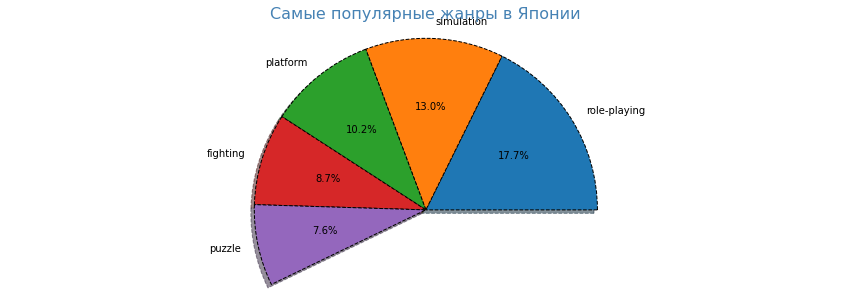

In [66]:
data_jp_pie_genre = data_jp_5_genre['жанр']
data_jp_pie_count_genre = data_jp_5_genre['доля']

fig, ax = plt.subplots(figsize = (15,5))
ax.pie(data_jp_pie_count_genre, labels = data_jp_pie_genre, autopct = '%1.1f%%',  shadow = True, 
       wedgeprops = {'lw':1, 'ls':'--','edgecolor':'k'},rotatelabels = False)
ax.axis('equal')
plt.title('Самые популярные жанры в Японии',fontsize = 16, color = 'SteelBlue')
plt.show()

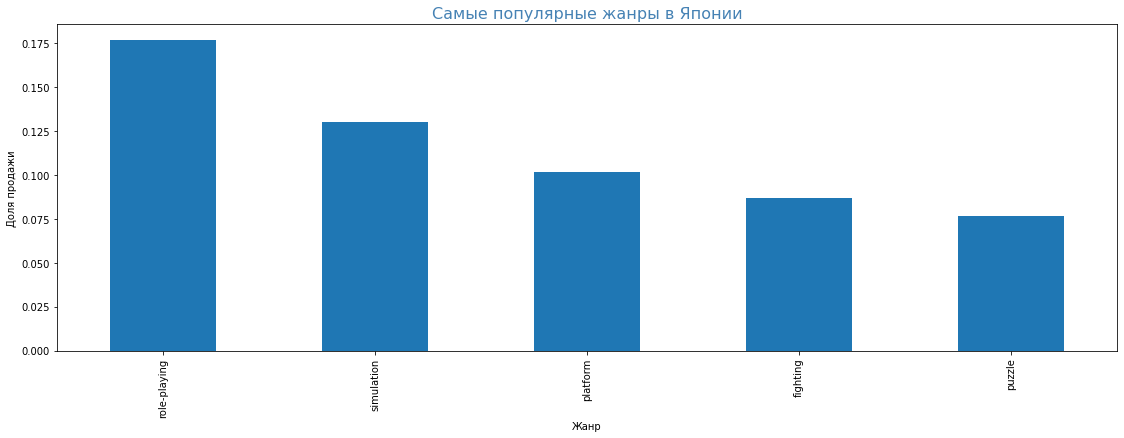

In [67]:
#построение баров по жанрам и их долям продаж
(data_jp_5_genre
    .sort_values(by = 'доля', ascending=False)
    .plot(kind = 'bar',x = 'жанр', y = 'доля', figsize = (19,6), legend = False)
)
plt.title('Самые популярные жанры в Японии', color = 'SteelBlue', fontsize = 16)
plt.xlabel('Жанр')
plt.ylabel('Доля продажи')
plt.show()

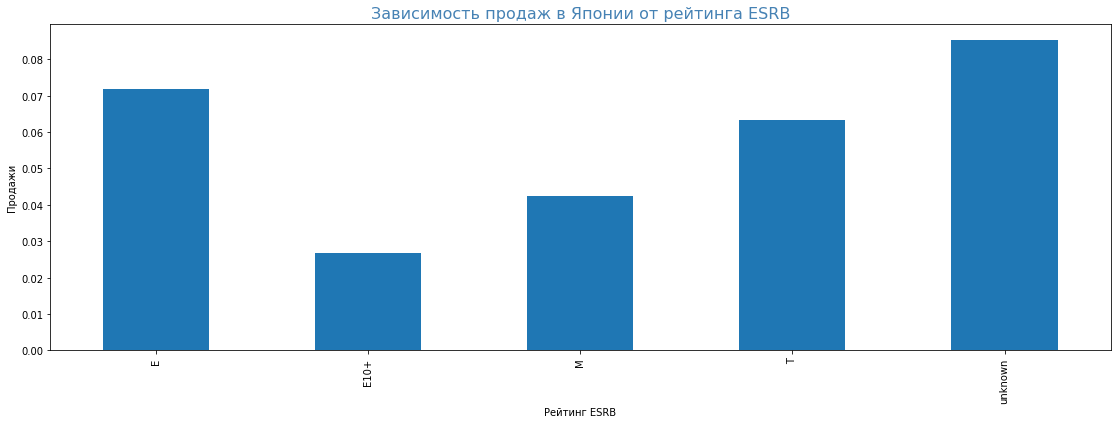

In [68]:
data_list_new.groupby('rating')['jp_sales'].mean().plot(kind='bar',  x='rating', y = 'jp_sales', 
                                                        figsize = (19,6), legend = False)
plt.title('Зависимость продаж в Японии от рейтинга ESRB',  color = 'SteelBlue', fontsize=16)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

**Комментарий:** *При формировании портрета пользователя Японии выяснилось, что самыми популярными платформами данных пользователей является: 3ds и ds. При рассмотрении популярных жанров данной категории пользователей выяснили, что большой популярностью обладает жанр role-playing,а так же simulation. При рассмотрении популярности среди рейтинга ESRB больше всего рейтинг, который не определен ESRPB, возможно в данной категории пользователей есть еще какой то ретинг помимо этого, как гипотеза, если рассматривать рейтинг ESRB выделяется категория E(Для всех с 6 лет) и T(Подросткам страше 13 лет). Разительное отличие от пользователей Европы и Северной Америки по всем параметрам.*

## Статистический анализ

Проверяем гипотезу: **средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

In [69]:
#формируем df логической индексацией для платформы xone
data_xone = data_list_new.loc[(data_list_new['platform'] == 'xone')&(data_list_new['user_score'] != 'tbd')]
data_xone['user_score'] = data_xone['user_score'].astype('float')

/tmp/ipykernel_490/724571319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_xone['user_score'] = data_xone['user_score'].astype('float')


In [70]:
#формируем df логической индексацией для платформы pc
data_pc = data_list_new.loc[(data['platform'] == 'pc')&(data_list_new['user_score'] != 'tbd')]
data_pc['user_score'] = data_pc['user_score'].astype('float')

/tmp/ipykernel_490/3384539721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['user_score'] = data_pc['user_score'].astype('float')


Формулируем одностороннюю гипотезу:

**Ho** = Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС

**Н1** = Средний пользовательский рейтинг платформы Xbox One больше, чем средний пользовательский рейтинг платформы РС

In [71]:
alpha = 0.05

results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], alternative='greater')

print ('Средний пользовательский рейтинг платформы Xbox One :', round(data_xone['user_score'].mean(),1))
print ('Средний пользовательский рейтинг платформы РС', round(data_pc['user_score'].mean(),1))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы Xbox One : 6.5
Средний пользовательский рейтинг платформы РС 6.4
p-значение: 0.2556066907417166
Не получилось отвергнуть нулевую гипотезу


Слишком большая вероятность того, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС, в связи с этим не отвергаем данную гипотезу в сторону альтернативной: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС

Проверяем гипотезу: **средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

In [72]:
data_action = data_list_new.loc[(data_list_new['genre'] == 'action')&(data_list_new['user_score'] != 'tbd')]
data_action['user_score'] = data_action['user_score'].astype('float')

/tmp/ipykernel_490/707806074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_action['user_score'] = data_action['user_score'].astype('float')


In [73]:
data_sports = data_list_new.loc[(data_list_new['genre'] == 'sports')&(data_list_new['user_score'] != 'tbd')]
data_sports['user_score'] = data_sports['user_score'].astype('float')

/tmp/ipykernel_490/168574646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sports['user_score'] = data_sports['user_score'].astype('float')


Формулируем двухстороннюю гипотезу:

**Ho** = Средний пользовательский рейтинг жанра action равен среднему пользовательскому рейтингу жанра sports

**Н1** = Средний пользовательский рейтинг жанра action не равен среднему пользовательскому рейтингу жанра sports

In [74]:
alpha = 0.05

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])

print('Средний пользовательский рейтинг жанра action ', round(data_action['user_score'].mean(), 1))
print('Средний пользовательский рейтинг жанра sports ', round(data_sports['user_score'].mean(), 1))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра action  6.8
Средний пользовательский рейтинг жанра sports  5.5
p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Слишком малая вероятность того, что средний пользовательский рейтинг  жанра action равен среднему пользовательскому рейтингу жанра sports, в связи с этим отвергаем данную гипотезу в сторону альтернативной: средний пользовательский рейтинг жанра action не равен среднему пользовательскому рейтингу жанра sports.

**Вывод:** 

У нас в распоряжении  из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года.В наборе данных есть аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Нам нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

После загрузки данных и просмотрев информацию по датафрему, можем сказать, что в данном датафрейме мы можем найти информацию: название игры, платформа, год выпуска, жанр игры, продажи в Северной Америке, продажи в Европе, продажи в Японии, продажи в других странах, оценка критиков, оценка пользователей, рейтинг от организации ESRB. Объем данных составляет 16713 строчек и 11 столбцов, после выведения информации методом info() так же можем увидеть, что данные имеют пропуски в некоторых столбцах: год выпуска, название, жанр, оценка критиков, оценка пользователей, рейтинг.

После обзора данных приступаем к **предобработке данных**, просматриваем по датафрему количество пропущенных значений, как и предполагалось на этапе обзора данных, пропущенные знанения имеются в столбцах:год выпуска, название, жанр, оценка критиков, оценка пользователей, рейтинг. Наибольшее количество пропусков находится в столбцах: оценка критиков(51%), оценка пользователей(40.1%), рейтинг(40.5%). Произвели обработку явных и неявных дубликатов.

Далее рассмотрели корреляцию значений между собой для обнаружения возможной взаимосвязи и возможной дальнейшей обработкой на данной взаимосвязи пропущенных значений, но данных взаимосвязей не обнаружено. В связи с этим принято решение не трогать пропуски в столбцах: год выпуска, оценка критиков, так как невозможно восстановить данные для точного анализа. В столбце оценка пользователей есть значение "tbd"(английская аббревиатура, которая означает «будет определено» или «будет установлено»),так как возможно пропущенные данные связаны с тем, что оценка пользователей еще не установлена  или не определена на данный момент, в связи с этим  замену пропусков в оценке пользователей заменили на "tbd". Так же сделали замену пропусков в рейтинге, на значение 'unknown' так как, оценка неизвестна, для удобной группировки значений в дальнейшем.

Далее приступили к **исследовательскому анализу** данных. При построении визуализации количетсва игр выпущенные в разные годы видим, что рост выпуска игр начинается с 1995 с последующим увеличением количества, пик приходится на 2007-2011 г. Резкий спад в 2012. *Для формирования прогноза на 2017 год, будем брать период с 2012 года, так как с этого периода значения находятся на одном уровне, при выборе более раннего периода произойдет искажение, так как слишком большой разрыв идет между 2011 и 2012 годом.*

При рассмотрении визуализации по изменению продаж по платформам с наибольшими суммарными продажами можно увидеть, что примерно с 1995 начинается резкий рост платформы рс, в связи с этим отмечен рост ранее по количеству выпущенных игр. Примерно с 2005 появляется много платформ с высокими продажами(х360, ds, psp и т.д.) и идет спад (gba, ps2) и исчезновение (ps), тем самым можно объяснить что именно с 2005 идет резкий рост количества выпущенных игр).

При построении визуализации данных за актуальный период (с 2012 года) можем увидеть *рост 2014-2016 платформы ps4 и xone, которые лидирует по продажам по сравнению с другими* и спад в 2013 платформы ps3, в связи с выходом новой ps4, хотя до этого по данной платформе 2012-2013 самые высокие продажи были именно на ней. Спад и возможное исчезновение произошло с платформами wii и psp.

При построении ящиков с усами по платформам и продажам *видим большие выбросы с продажами у платформы ps3, x360, ps4 и 3ds вероятнее всего связанные с отдельными играми, которые пользуются большой популярностью и в связи с этим имеют высокие продажи. Более широкий межквартальный размах имеют платформы ps4, ps3, x360, xone  и wiiu скорее всего имеют большее количество данных и их разброс по продажам по сравнению с другими. Так же можно увидеть, что медианное значение продаж  x360 выше, чем на других платформах, на примерно одном уровне достаточно высоком находится медианное значений продаж платформ ps3, ps4, xone, wiiu, wii.

Малое количество данных по продажам на платформах psv, хотя имеются ряд выбросов связанные с отдельной популярностью определенных игр и платформа psp имеющая минимальные продажи. При рассмотрении медианного значения продаж очень низкие по сранению с другими платформами у psv, psp и количество значений продаж значительно меньше, чем на других платформах.

Для рассмотрения *зависимости продаж от оценок критиков и пользователей взяли на рассмотрение данные по платформах ps4, 3ds, pc. При рассмотрении корреляции значений можно обратить внимание на наличии прямой, слабой степени выраженности взаимосвязи между продажами и оценкой критиков. 

При рассмотрении данных по распределению жанров и их визуализации можем увидеть, что *жанр platform имеет большое преимущество, посравнению с другими жанрами, соотношение количества и медианной суммы продаж высокое, данный жанр пользуется популярностью. Далее жанры shooter и strategy имеют так же значительную долю по отношению количества к продажам, что говорит о том, что данные игры имеют определенную популярность, хотя игр жанра platform в три раза меньше, чем жанра shooter. 

Жанр имеющий меньшую популярность, так как доля продаж у него самая низкая это adventure.

При формировании *портрета пользователя Европы выяснилось, что самыми популярными платформами данных пользователей является: x360 и ps4. При рассмотрении популярных жанров данной категории пользователей выяснили, что большой популярностью обладает жанр shooter, в тройку входит так же sports и platform. При рассмотрении популярности среди рейтинга ESRB выделяется категория M (Для взрослых, страше 17 лет). Схожие портреты у пользователей Северной Америки и Европы, отличие лишь в популярности определенных платформ.

При формировании *портрета пользователя Японии выяснилось, что самыми популярными платформами данных пользователей является: 3ds и ds. При рассмотрении популярных жанров данной категории пользователей выяснили, что большой популярностью обладает жанр role-playing,а так же simulation. При рассмотрении популярности среди рейтинга ESRB больше всего рейтинг, который не определен ESRPB, возможно в данной категории пользователей есть еще какой то ретинг помимо этого, как гипотеза, если рассматривать рейтинг ESRB выделяется категория E(Для всех с 6 лет) и T(Подросткам страше 13 лет). Разительное отличие от пользователей Европы и Северной Америки по всем параметрам.

При проверке ряда гипотез, выяснили, что *слишком большая вероятность того, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС, в связи с этим не отвергаем данную гипотезу в сторону альтернативной: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС

И *слишком малая вероятность того, что средний пользовательский рейтинг  жанра action равен среднему пользовательскому рейтингу жанра sports, в связи с этим отвергаем данную гипотезу в сторону альтернативной: средний пользовательский рейтинг жанра action не равен среднему пользовательскому рейтингу жанра sports.

*Рекомендации:* **в связи с прогнозом на 2017 год основной расчет рекламных компаний можно делать на платформы ps4, xone, x360, 3ds. Так как первые три имеют большее количетсво продаж на данный момент, 2 вторые меньше, но имеют большую популярность в Японии и Северной Америке. По жанру выпуска игр рекомендуются игры жанров shooter,sports и platform, а так же жанра role-playing, так как имеют большую популярность среди пользователей Японии, так как их интересы значительно отличаются от Европы и Северной Америки. Для расширения и увеличения данного сигмента этой аудитории.**